# HTTP
* HTTPリクエスト
* BeautifulSoupでページタイトル抽出
* BeautifulSoupで特定条件抽出
* 画像ダウンロード・表示

In [19]:
from urllib import request 
from bs4 import BeautifulSoup
import json
from PIL import Image
import io
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# HTTPリクエスト
url = 'https://chefgohan.gnavi.co.jp/detail/95/'
response = request.urlopen(url)
soup = BeautifulSoup(response)
response.close()

In [21]:
# BeautifulSoupでページタイトル抽出
title_http = soup.title.text
print('title:', title_http)

title: 肉じゃが 野永 喜三夫シェフのレシピ | シェフごはん


In [22]:
# BeautifulSoupで特定条件抽出
inst_http = soup.find('div',class_='list_flow01').findAll('p',class_='txt')
instructions = [i.string for i in inst_http]
print('instructions', *instructions, sep='\n ')

instructions
 玉葱を繊維に沿ってくし切りで約3cm程度の大きさに揃えておく。
 フライパンにあわせだし汁を入れ、まだ冷たいだし汁の中にお肉をほぐしながら入れ、野菜を加えキッチンペーパーで落し蓋をし火をつけて強火で一度煮立てる。
 煮立ったら中火にし、約15分ほど煮る。　＊具材は決して混ぜないで煮立てる。炒めないで炊くだけ！
 出汁が半分くらいに煮詰まったら、火を止め、具材に味を浸み込ませるため、一度常温になるまで冷ます。　（1～2時間）　※この時点ではまだ味は薄い状態。
 再度火にかけます。落し蓋を外し中火にかけ、フライパンを傾けて出汁を材料にかけながら、好みの味になるまで煮詰める。味を整えたら、火を止める。
 皿に盛り付け、お好みできぬさやをちらして完成。


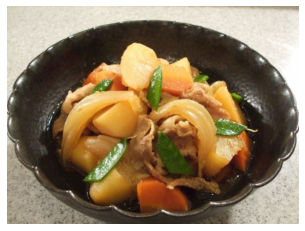

In [23]:
# 画像ダウンロード・表示
ok = soup.find('script', type='application/ld+json')
if ok is not None:
    txt_chef = ok.string
    json_chef = json.loads(txt_chef)
    img_url = json_chef['image']
    try:
        file =io.BytesIO(request.urlopen(img_url).read())
        img = Image.open(file)
        im_list = np.asarray(img)
        plt.axis("off")
        plt.imshow(im_list)
        plt.show()
    except:
        print('File not found.')
